# Question 2 - Predict whether a person has Diabetes

The diabetes dataset has some features which help deduce if a person has diabetes or not. The colums are:  
**Glucose: Glucose concentration in a oral test within 2 hours  
Insulin: Insulin levels within 2 hours  
Age: Age of person  
Outcome: 0 (No Diabetes) or 1(Diabetes)**

## Task:
Predict whether a person has diabetes using two features of the three given. 

## Questions
1. Are there any missing rows or incorrect values in the dataset? Justify. If yes, remove them.
2. How does Glucose and Insulin vary for Diabetics and Non Diabetics at the age of 25?
3. At what age is a person most susceptible to Diabetes?
4. Is the data given biased to you? Justify.
5. Plot a pair wise scatter plot of every feature.
6. Using Perceptron Model, with the entire dataset, find out if a person of 43 years has diabetes based on a Glucose level of 114 and 0 Insulin level? Also plot the separation using the meshgrid approach.
7. If you use an unbiased fitting method, with the entire dataset, does the outcome change for the same input values as above? Also plot the separation using the meshgrid approach.
8. **Important** Predict the outcome for the entire dataset using the model created in Question 7. Get the confusion matrix. What are your comments on the Perceptron and SVM model?

In [7]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,Insulin,Age,Outcome
0,85,0,31,0
1,89,94,21,0
2,116,0,30,0
3,115,0,29,0
4,110,0,30,0


In [2]:
df.isnull().sum()

Glucose    0
Insulin    0
Age        0
Outcome    0
dtype: int64

In [8]:
data=df.dropna()
data.head()

,Glucose,Insulin,Age,Outcome
0,85,0,31,0
1,89,94,21,0
2,116,0,30,0
3,115,0,29,0
4,110,0,30,0


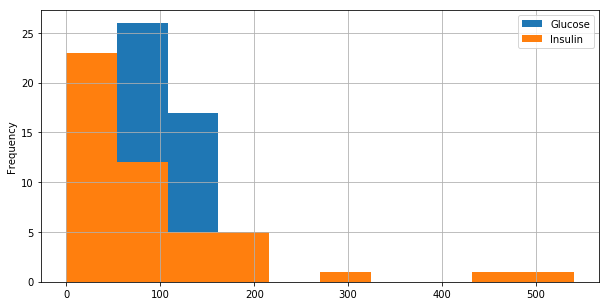

In [23]:
import matplotlib.pyplot as  plt
op1=df[df["Age"]==25]
op1[['Glucose','Insulin']].sort_index().plot(kind="hist",figsize=(10,5),grid=True)

In [26]:
print("The age at which a person is most susceptible to Diabetes is:",df["Age"].value_counts().max())

The age at which a person is most susceptible to Diabetes is: 72


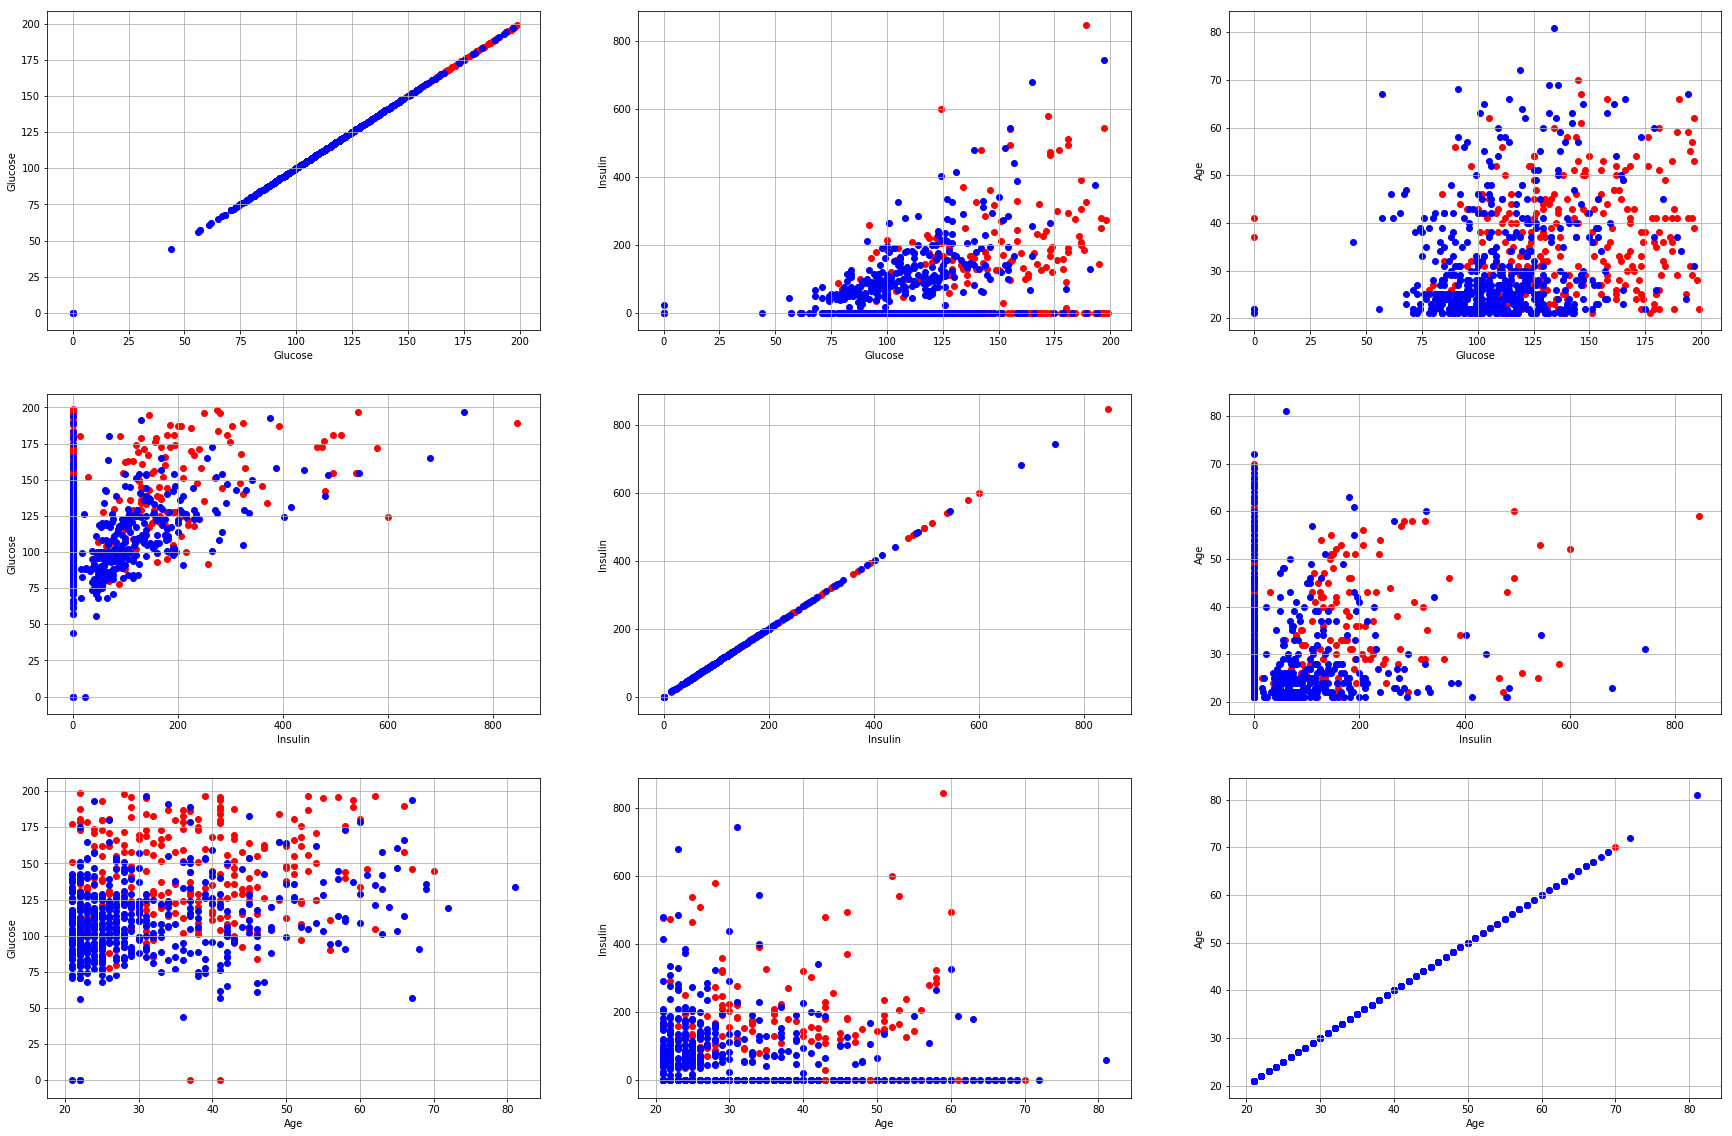

In [68]:
cols = ['Glucose', 'Insulin', 'Age', 'Outcome']
diabetes=df[df['Outcome']==1]
nodiabetes=df[df['Outcome']==0]
plt.figure(figsize=(30,20))
for i in range(0,3):
    for j in range(0,3):
        plt.subplot(3,3,i*3+j+1)
        plt.scatter(diabetes[cols[i]],diabetes[cols[j]],color='r')
        plt.scatter(nodiabetes[cols[i]],nodiabetes[cols[j]],color='b')
        #plt.scatter(iris_versicolor[cols[i]],iris_versicolor[cols[j]],color='b')
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.grid(True)


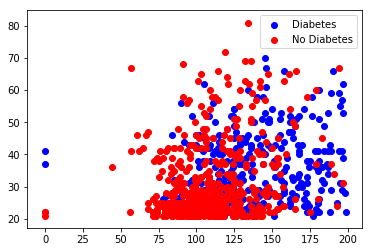

In [67]:
plt.scatter(diabetes["Glucose"],diabetes['Age'],color='b',label="Diabetes")
plt.scatter(nodiabetes["Glucose"],nodiabetes["Age"],color='r',label="No Diabetes")
plt.legend()


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Glucose','Age']],df['Outcome'],test_size=0.2,random_state=30)

In [45]:
from sklearn.linear_model import Perceptron

classifier= Perceptron(max_iter=100000)
model= classifier.fit(x_train,y_train)
pred=model.predict(x_test)
print("Expected Values:",y_test.tolist())
print("Predited Values:",pred)

Expected Values: [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
Predited Values: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


[[0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 ...
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]]
[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 [ 0.2  0.2  0.2 ...  0.2  0.2  0.2]
 ...
 [99.7 99.7 99.7 ... 99.7 99.7 99.7]
 [99.8 99.8 99.8 ... 99.8 99.8 99.8]
 [99.9 99.9 99.9 ... 99.9 99.9 99.9]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [1.1 0. ]
 [1.2 0. ]
 [1.3 0. ]
 [1.4 0. ]
 [1.5 0. ]
 [1.6 0. ]
 [1.7 0. ]
 [1.8 0. ]
 [1.9 0. ]]
[0 0 0 ... 1 1 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0

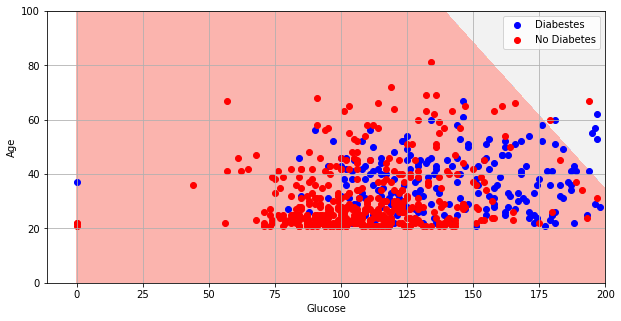

In [51]:
%matplotlib inline
import numpy as np
x_min,x_max=0,200
y_min,y_max=0,100

x_train_high=x_train[y_train==1]
x_train_low=x_train[y_train==0]

xx,yy=np.meshgrid(np.arange(x_min,x_max,.1),np.arange(y_min,y_max,.1))
print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); # ravel converts list into a single series
yy_lin=yy.ravel(); print(yy_lin[:10]);
pred_input=np.c_[xx_lin,yy_lin]; print(pred_input[:20]) # combine both lists into set of one list

Z=model.predict(pred_input); print(Z);
Z=Z.reshape(xx.shape); print(Z);

# Countour plot requires 2 dimensional matrix
plt.figure(figsize=(10,5))
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(x_train_high['Glucose'],x_train_high['Age'],color='b',label="Diabestes")
plt.scatter(x_train_low['Glucose'],x_train_low['Age'],color='r',label="No Diabetes")
plt.xlabel("Glucose")
plt.ylabel("Age")
plt.legend()
plt.grid()


In [32]:
det1=pd.DataFrame({'Glucose':[114],'Age':[43],'Insulin':[0]})
det1

,Glucose,Age,Insulin
0,114,43,0


In [36]:
pred1=model.predict(det1[["Glucose","Age"]])
print("Prediction of having diabetes:",pred1,'- The person does not have diabetes')

Prediction of having diabetes: [0] - The person does not have diabetes


In [62]:
from sklearn.svm import SVC
SVCClassifer = SVC(kernel='linear',C=10)
SVCModel = SVCClassifer.fit(x_train,y_train)
p=SVCModel.predict(x_test)
print("Pred:",p)
print("Expected:",y_test.tolist())

Pred: [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0]
Expected: [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]


[[0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 ...
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
 [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]]
[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 [ 0.2  0.2  0.2 ...  0.2  0.2  0.2]
 ...
 [99.7 99.7 99.7 ... 99.7 99.7 99.7]
 [99.8 99.8 99.8 ... 99.8 99.8 99.8]
 [99.9 99.9 99.9 ... 99.9 99.9 99.9]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [1.1 0. ]
 [1.2 0. ]
 [1.3 0. ]
 [1.4 0. ]
 [1.5 0. ]
 [1.6 0. ]
 [1.7 0. ]
 [1.8 0. ]
 [1.9 0. ]]


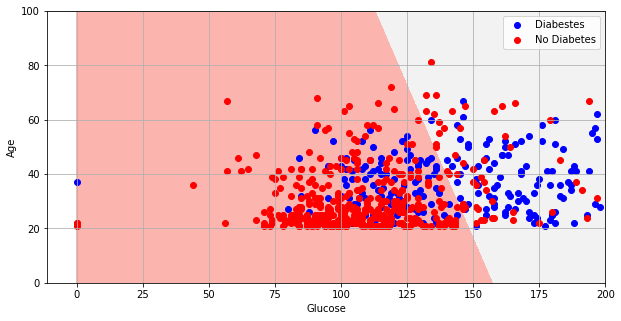

In [63]:
%matplotlib inline
import numpy as np
x_min,x_max=0,200
y_min,y_max=0,100

x_train_high=x_train[y_train==1]
x_train_low=x_train[y_train==0]

xx,yy=np.meshgrid(np.arange(x_min,x_max,.1),np.arange(y_min,y_max,.1))
print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); # ravel converts list into a single series
yy_lin=yy.ravel(); print(yy_lin[:10]);
pred_input=np.c_[xx_lin,yy_lin]; print(pred_input[:20]) # combine both lists into set of one list

SVC_Z=SVCModel.predict(pred_input)
SVC_Z=SVC_Z.reshape(xx.shape)

# Countour plot requires 2 dimensional matrix
plt.figure(figsize=(10,5))
plt.contourf(xx,yy,SVC_Z,cmap=plt.cm.Pastel1)
plt.scatter(x_train_high['Glucose'],x_train_high['Age'],color='b',label="Diabestes")
plt.scatter(x_train_low['Glucose'],x_train_low['Age'],color='r',label="No Diabetes")
plt.xlabel("Glucose")
plt.ylabel("Age")
plt.legend()
plt.grid()


In [64]:
from sklearn import metrics
con=metrics.confusion_matrix(y_test,p)
con

array([[88, 10],
       [23, 33]], dtype=int64)

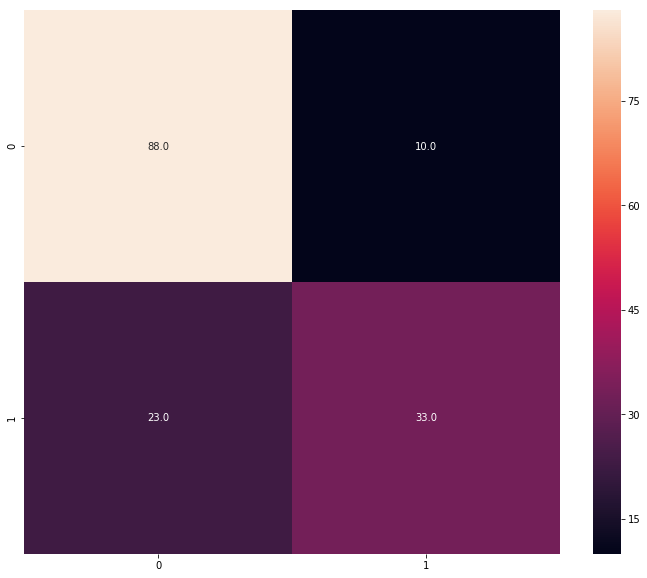

In [65]:
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(con,annot=True,fmt='.1f')